In [55]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

* Loading the dataset from the torch

In [56]:
transform = transforms.Compose([transforms.ToTensor()])


In [57]:
training_data = torchvision.datasets.MNIST(root="data", train=True, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(training_data, batch_size=4, shuffle=True, num_workers=2)

In [58]:
test_data = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=4, shuffle=True, num_workers=2)

In [59]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [60]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [61]:
img, label = training_data[0]

In [62]:
img.shape

torch.Size([1, 28, 28])

In [63]:
label

5

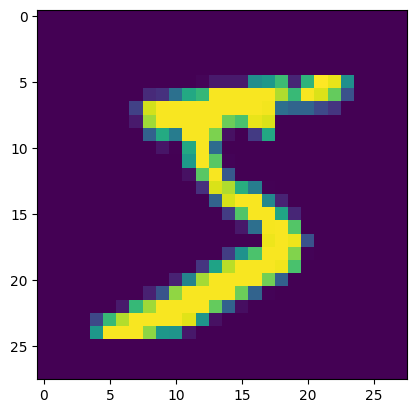

In [64]:
plt.imshow(img.reshape((28,28)))

In [65]:
test_flatten = nn.Flatten()
test_flatten(img).size()

torch.Size([1, 784])

* Building Model

In [66]:
class NN(torch.nn.Module):
    
    def __init__(self):
        super(NN,self).__init__()
        self.flatten = nn.Flatten() 
        self.network = nn.Sequential(
            nn.Linear(in_features=784, out_features = 128),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features = 64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features = 10)
        )


    def forward(self, X):
        flattened_X = self.flatten(X)
        return self.network(flattened_X)


    

* Checking if the system contain CUDA or running on CPU

In [67]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"

In [68]:
device

'cpu'

In [69]:
model =NN().to(device=device)

* Getting total params

In [70]:
for params in model.parameters():
    print(params.numel())

100352
128
8192
64
640
10


In [71]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name)

network.0.weight
network.0.bias
network.2.weight
network.2.bias
network.4.weight
network.4.bias


In [72]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
EPOCH = 10

In [73]:
for epoch in range(EPOCH):
    running_loss = 0
    lost_per_batch = 0

    model.train(True)

    for i, data in enumerate(training_loader):
        inputs, labels = data
        opAtimizer.zero_grad()
        output = model(inputs.to(device=device))

        loss = loss_fn(output, labels.to(device=device))
        loss.backward()

        optimizer.step()

        running_loss = running_loss + loss.item()

        if i % 999:
            loss_per_batch = running_loss / 1000
            print(f"batch :{i} loss: {loss_per_batch}")
    
    running_vloss = 0.0
    model.eval()

    with torch.no_grad():
        for i, vdata in enumerate(test_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs.to(device))
            vloss = loss_fn(voutputs, vlabels.to(device))
            running_loss+=vloss
    
    avg_vloss = running_loss / (i+1)

    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = f"model_{epoch}"
        torch.save(model.state_dict(), model_path)
    
    epoch_number+=1

print("Training is completeds")

batch :1 loss: 0.004588731050491333
batch :2 loss: 0.006922491312026977
batch :3 loss: 0.009239238977432252
batch :4 loss: 0.011541526079177857
batch :5 loss: 0.013852202653884888
batch :6 loss: 0.01619339394569397
batch :7 loss: 0.018479326009750364
batch :8 loss: 0.02079016160964966
batch :9 loss: 0.023104389190673827
batch :10 loss: 0.025371275901794433
batch :11 loss: 0.027700244903564455
batch :12 loss: 0.02998587679862976
batch :13 loss: 0.0322965350151062
batch :14 loss: 0.03464620518684387
batch :15 loss: 0.03695018267631531
batch :16 loss: 0.03926546025276184
batch :17 loss: 0.04157241725921631
batch :18 loss: 0.04388110494613647
batch :19 loss: 0.04627742624282837
batch :20 loss: 0.048599239349365234
batch :21 loss: 0.05093250226974487
batch :22 loss: 0.05324207305908203
batch :23 loss: 0.05556449508666992
batch :24 loss: 0.057803855657577514
batch :25 loss: 0.060129891872406006
batch :26 loss: 0.062415382862091064
batch :27 loss: 0.06477588534355164
batch :28 loss: 0.0671169

In [76]:
model_loader = NN()
model_loader.load_state_dict(torch.load(model_path))


<All keys matched successfully>

In [127]:
img = test_data[784][0]

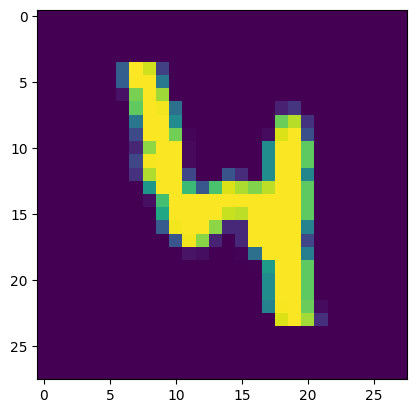

In [128]:
plt.imshow(
    img.reshape(28,28))

In [129]:
output = model_loader(img)

In [130]:
output.tolist()

[[-3.630014181137085,
  -6.410649299621582,
  -0.5602093935012817,
  -0.7990720868110657,
  5.853903293609619,
  0.27085167169570923,
  0.4802921414375305,
  -0.8158729076385498,
  1.6992127895355225,
  3.561619758605957]]

In [131]:
predict = torch.max(output, 1)

In [132]:
predict

torch.return_types.max(
values=tensor([5.8539], grad_fn=<MaxBackward0>),
indices=tensor([4]))

In [133]:
model_loader.eval()

NN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

AttributeError: 'Tensor' object has no attribute 'eval'